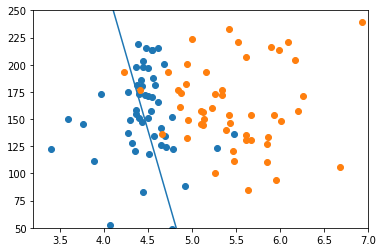

In [7]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

np.random.seed(0)

X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

X[:, 0] = X[:, 0] * 0.5 + 5
X[:, 1] = X[:, 1] * 30 + 160

fig, ax = plt.subplots()
ax.scatter(X[y == 0, 0], X[y == 0, 1])
ax.scatter(X[y == 1, 0], X[y == 1, 1])

x1 = np.linspace(3.5, 7.0, 100)
x2 = x1 * -280 + 1400
# a better version?:
#x2 = x1 * -300 + 1600

plt.plot(x1, x2)

plt.ylim(50, 250)
plt.xlim(3.2, 7.0)

plt.show()


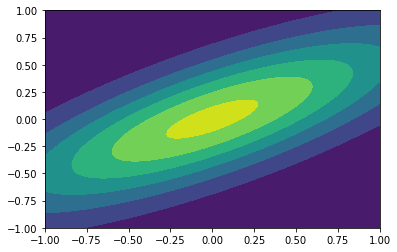

In [11]:
def get_cov(sdx=1, sdy=1, rotangdeg=0):
  covar = np.array([[sdx, 0], [0, sdy]])
  rot_ang = rotangdeg / 360 * 2 * np.pi
  rot_mat = np.array([[np.cos(rot_ang), -np.sin(rot_ang)], [np.sin(rot_ang), np.cos(rot_ang)]])
  
  covar = np.matmul(np.matmul(rot_mat, covar), rot_mat.T)
  return covar 

x1line = np.linspace(-1, 1, 200) 
x2line = np.linspace(-1, 1, 200)

x1grid, x2grid = np.meshgrid(x1line, x2line) 

Xgrid = np.array([x1grid, x2grid]).reshape([2,40000]).T

covar = get_cov(sdx=1, sdy = 0.1, rotangdeg = 30)

p = 1 / (2 * np.pi * np.sqrt(np.linalg.det(covar))) * np.exp(
    -1 / 2 * (np.matmul(Xgrid, np.linalg.inv(covar)) * Xgrid).sum(-1))

pgrid = np.reshape(p, [200, 200])

fig, ax = plt.subplots()
plt.contourf(x1line, x2line, pgrid)

plt.show()

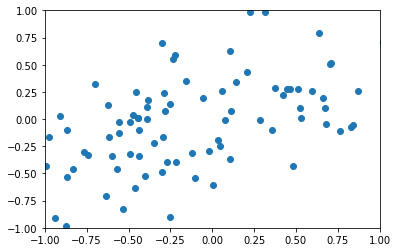

In [22]:
distvals = np.random.multivariate_normal([0, 0], covar, 100)
#distvals = np.random.multivariate_normal([0, 0], covar, 20000) # to compare with distribution

fig, ax = plt.subplots()

ax.scatter(distvals[:, 0], distvals[:, 1])
#ax.scatter(distvals[:, 0], distvals[:, 1], s = 1) # to compare with distribution 
plt.ylim(-1, 1)
plt.xlim(-1, 1)

plt.show()

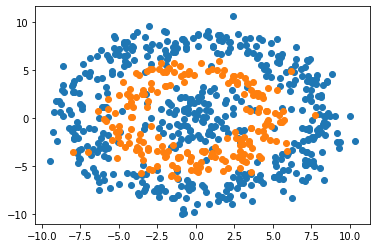

In [27]:
def gen_circular_distribution(n=700, scale=1):
    a = np.round(n / 7).astype('int')
    b = np.round(2*n / 7).astype('int')
    c = n - a - b
    r1 = np.concatenate(
        [np.random.normal(loc=2, scale=scale, size=[a, 1]), np.random.normal(loc=8, scale=scale, size=[c, 1])])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a+c, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a+c, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a+c, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a+c, 1]), np.ones([b, 1])]).squeeze()
    return X, y




X, y = gen_circular_distribution(n=700, scale=1)

fig, ax = plt.subplots()
ax.scatter(X[y == 0, 0], X[y == 0, 1])
ax.scatter(X[y == 1, 0], X[y == 1, 1])

plt.show()
